# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image


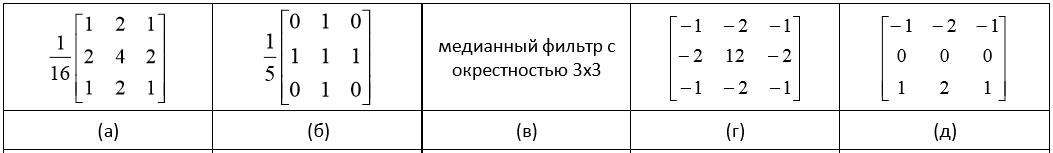

### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.

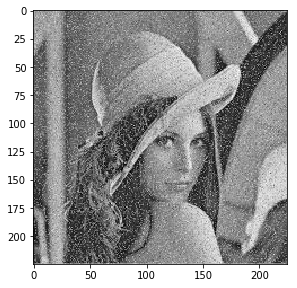

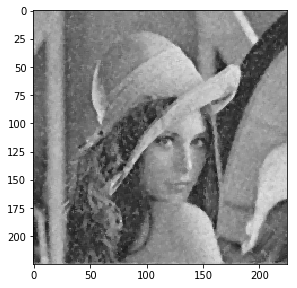

In [4]:
#TASK #1.3 mediann filter
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('lena.jpg')
from scipy import ndimage
import scipy.misc
import numpy as np
from scipy import ndimage as nimg
import numpy as np
im2 =nimg.median_filter(imlen, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imlen,cmap='gray')
fig2 = plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(im2,cmap='gray')

Shape of original image: (225, 225)
[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
[[ 7.07106781]
 [ 5.65685425]
 [ 4.24264069]
 [ 2.82842712]
 [ 1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]
 [ 4.24264069]
 [ 5.65685425]]


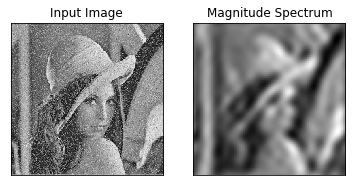

In [17]:
##TASK #1.2
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
img = cv2.imread('lena.jpg',0)
img_float32 = np.float32(img)
print('Shape of original image:',img_float32.shape)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# Return the Discrete Fourier Transform sample frequencies.
freqs = np.fft.fftfreq(10, 0.1)
print(freqs)
freqs_shifted = np.fft.fftshift(freqs)
print(freqs_shifted)
print(cv2.magnitude(freqs_shifted,freqs_shifted))
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 10
# create a mask first, center square is 1, remaining all zeros
mask_ = np.zeros((rows, cols, 2), np.uint8)
mask_[crow-flt_size:crow+flt_size, ccol-flt_size:ccol+flt_size,:] = 1
new_shift = dft_shift*mask_
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

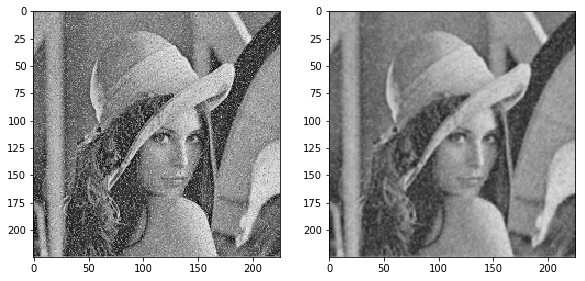

In [25]:
from scipy import ndimage as nimg
import numpy as np
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('./lena.jpg')
gflt = nimg.gaussian_filter(imlen, sigma=0.8)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imlen)
plt.subplot(132)
plt.imshow(gflt)

116.0


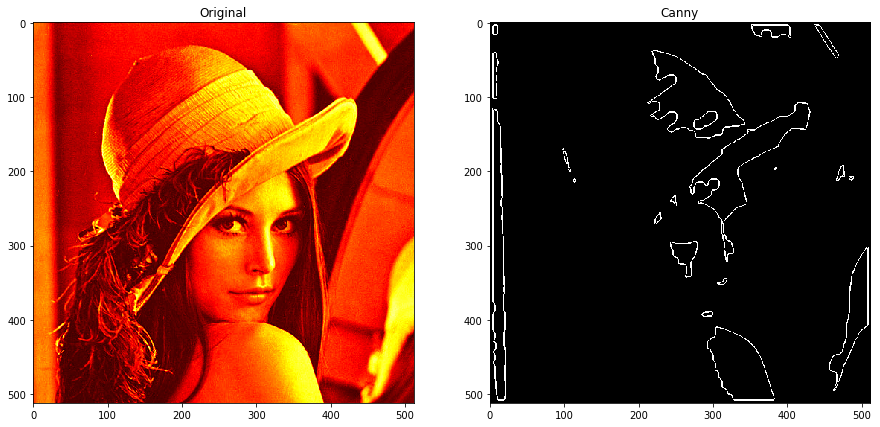

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import ndimage as ndimg
from PIL import Image
import math
from skimage import data
from skimage import feature
from skimage import io
from skimage.data import data_dir
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
fig = plt.figure(figsize=(15,60))
glena = Image.open('lena_cover.jpg').convert('L')
# Binarization of lena
tt_glena = np.median(lena) + 20
print(tt_glena)
b1_glena = glena > tt_glena

# Erosion of both pics
selem = disk(6)
selem = disk(2)
e_glena = erosion(b1_glena, selem)

# Skeletonization
sk_glena = skeletonize(e_glena == 0)


# Canny filter
c_glena = feature.canny(e_glena, sigma=1)


# Plotting
plt.subplot(6, 2, 3)
plt.imshow(glena, cmap='hot')
plt.title('Original')
plt.subplot(6, 2,4 )
plt.imshow(c_glena, cmap='gray')
plt.title('Canny')


plt.show()

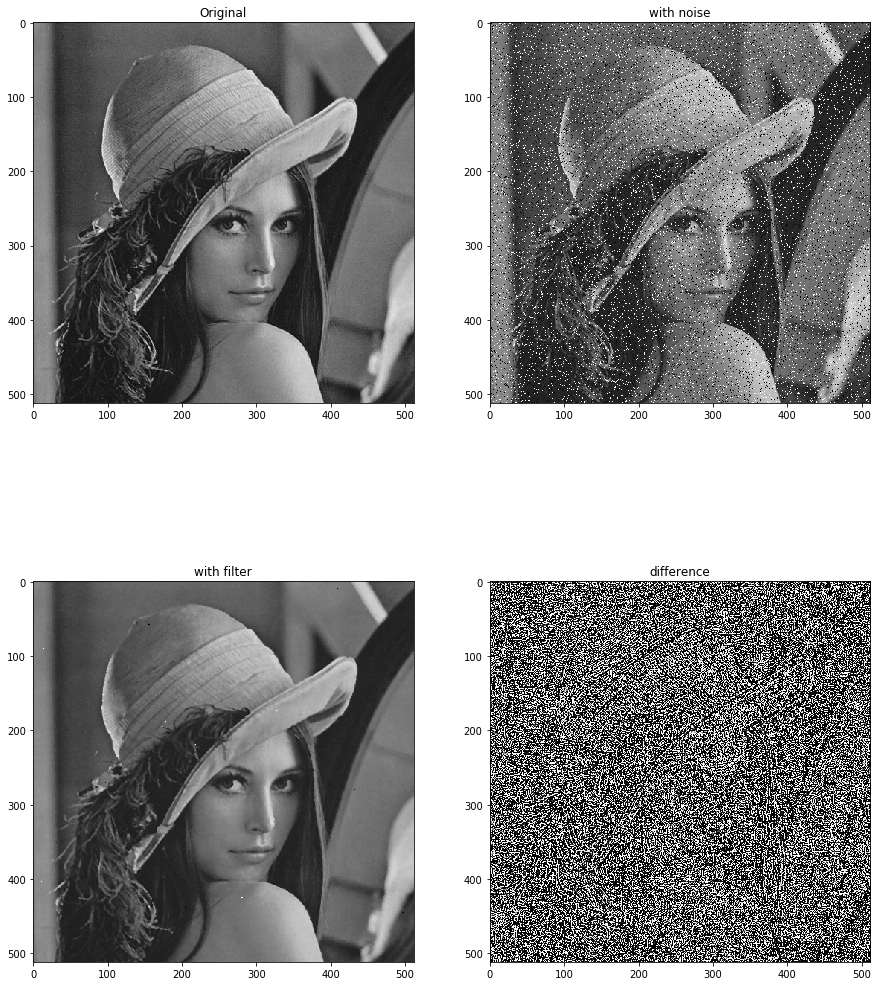

In [63]:
import numpy as np
import random
import cv2
from scipy import ndimage as nimg
import numpy as np
fig = plt.figure(figsize=(15,60))
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('lena_cover.jpg',0) # Only for grayscale image
cv2.imwrite('sp_noise.jpg', noise_img)
output_img= cv2.imread('sp_noise.jpg',0)
noise_img = sp_noise(image,0.05)
imlen_new = nimg.median_filter(output_img, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)

plt.subplot(6, 2, 3)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(6, 2, 4)
plt.title('with noise')
plt.imshow(output_img,cmap='gray')
plt.subplot(6, 2, 5)
plt.title('with filter')
plt.imshow(imlen_new,cmap='gray')
plt.subplot(6, 2, 6)
plt.title('difference')
plt.imshow((imlen_new-output_img), cmap='gray')